<a href="https://colab.research.google.com/github/zeguii/project-data/blob/main/ProjetoOlist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(112650, 26)


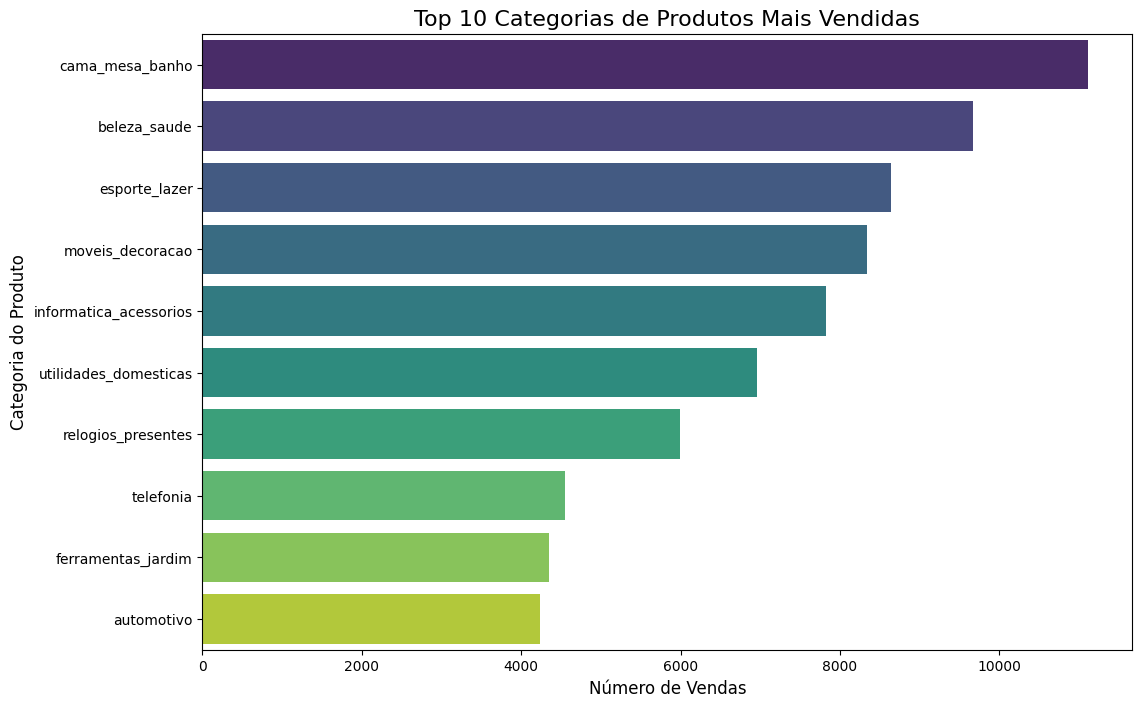

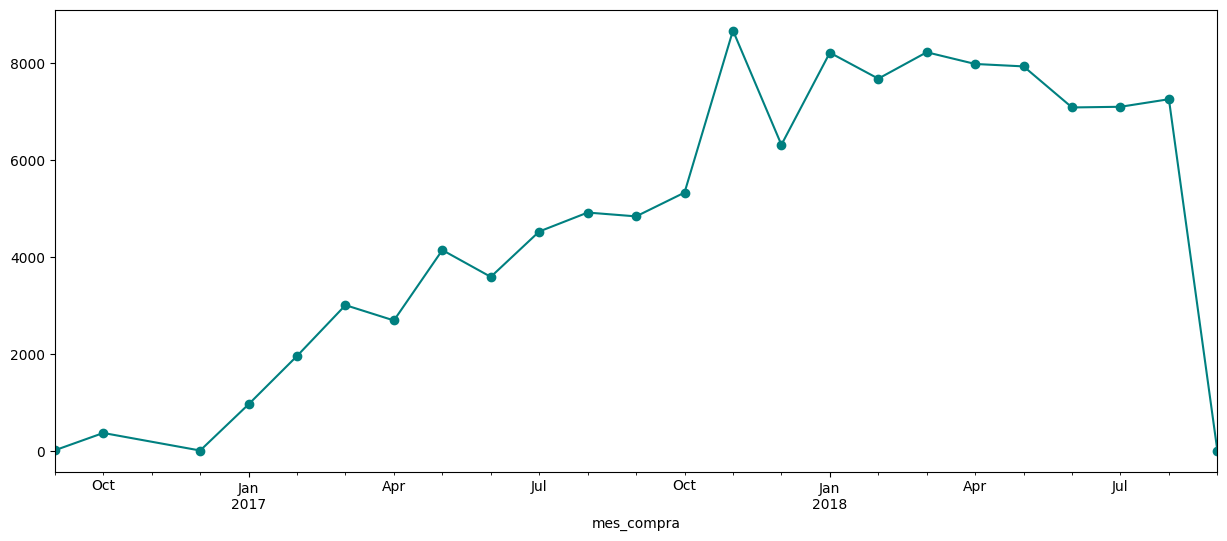

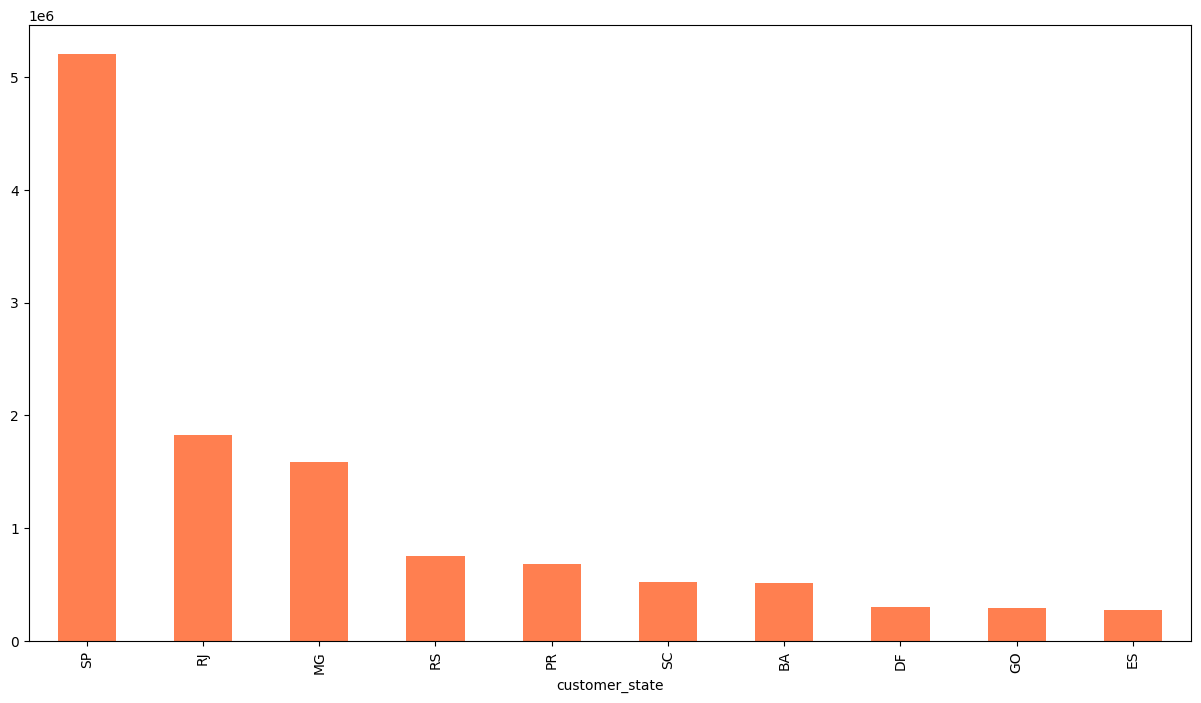

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_pedidos = pd.read_csv('/content/olist_orders_dataset.csv')
df_itens = pd.read_csv('/content/olist_order_items_dataset.csv')
df_produtos = pd.read_csv('/content/olist_products_dataset.csv')
df_clientes = pd.read_csv('/content/olist_customers_dataset.csv')

df_merge = pd.merge(df_pedidos, df_itens, on = 'order_id')
df_merge = pd.merge(df_merge, df_produtos, on = 'product_id')
df_completo = pd.merge(df_merge,df_clientes, on = 'customer_id')

print(df_completo.shape)

df_completo['product_category_name'] = df_completo['product_category_name'].fillna('desconhecida')
df_completo['order_purchase_timestamp'] = pd.to_datetime(df_completo['order_purchase_timestamp'])

top_10_categorias = df_completo['product_category_name'].value_counts().head(10)
plt.figure(figsize=(12,8))
sns.barplot(y=top_10_categorias.index, x=top_10_categorias.values, orient='h', palette='viridis', hue=top_10_categorias.index, legend=False)
plt.title('Top 10 Categorias de Produtos Mais Vendidas', fontsize=16)
plt.xlabel('Número de Vendas', fontsize=12)
plt.ylabel('Categoria do Produto', fontsize=12)
plt.show()

df_completo['mes_compra'] = df_completo['order_purchase_timestamp'].dt.to_period('M')
vendas_por_mes = df_completo['mes_compra'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
vendas_por_mes.plot(kind='line', marker='o', color='teal')
plt.show()

faturamento_por_estado = df_completo.groupby('customer_state')['price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 8))
faturamento_por_estado.plot(kind='bar', color='coral')
plt.show()